In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billboard-hits-songs-dataset/Iconic_Songs_Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/billboard-hits-songs-dataset/Iconic_Songs_Dataset.csv')
df.head()

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94


In [3]:
df.shape

(100, 7)

In [4]:
df.isna().sum()

Title          0
Artist         0
Genre          0
ReleaseDate    0
Duration       0
Album          2
Popularity     0
dtype: int64

In [5]:
df['Album'].unique()

array(['After Hours', 'Future Nostalgia', 'Justice', 'SOUR',
       'F*CK LOVE 3: OVER YOU', 'Planet Her', 'Montero', 'Butter',
       'Happier Than Ever', '=', '30', 'Dawn FM', 'Music of the Spheres',
       'Seven Shades of Heartbreak', 'The Lockdown Sessions', 'Dreamland',
       'CKay the First', 'Country Stuff', 'Made in Lagos', 'Starboy',
       'evermore', 'Positions', "Hollywood's Bleeding", 'BE', 'Fine Line',
       'Slime & B', nan, 'Divinely Uninspired To A Hellish Extent',
       'While The World Was Burning', 'Scary Hours 2',
       'Pretty Bitch Music', 'Shoot for the Stars Aim for the Moon',
       'Certified Lover Boy', 'Jordi', 'Chromatica',
       "When It's All Said and Done", 'Certified Hitmaker',
       'Cuz I Love You', 'ROXANNE', 'Hot Pink', '7 EP', 'Shawn Mendes',
       'Fever', 'Happiness Begins', 'Indigo', 'Melt',
       'Marshmello: Fortnite Extended Set', 'Manic',
       'Friends Keep Secrets', 'Goodbye & Good Riddance', 'Mudboy',
       'Astroworld', 'Inva

In [6]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

           Title                         Artist Genre ReleaseDate Duration  \
40  Stuck with U  Ariana Grande & Justin Bieber   Pop  2024-03-10     3:48   
56   Savage Love       Jawsh 685 & Jason Derulo   Pop  2024-05-30     2:51   

   Album  Popularity  
40   NaN          86  
56   NaN          92  


In [7]:
df['Album'].fillna('single', inplace=True)
df.loc[40]

/tmp/ipykernel_18/1723460267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Album'].fillna('single', inplace=True)


Title                           Stuck with U
Artist         Ariana Grande & Justin Bieber
Genre                                    Pop
ReleaseDate                       2024-03-10
Duration                                3:48
Album                                 single
Popularity                                86
Name: 40, dtype: object

In [8]:
df.describe()

,Popularity
count,100.000000
mean,91.710000
std,3.806679
min,84.000000
25%,89.000000
50%,92.000000
75%,95.000000
max,99.000000


In [9]:
# Number of unique artists
df["Artist"].nunique()

69

In [10]:
# Number of songs in each genre
genre_counts = df["Genre"].value_counts()
print(genre_counts)

Genre
Pop           59
Hip-Hop       26
Reggaeton      4
K-Pop          3
R&B            3
Afrobeats      2
Country        1
Dance          1
Electronic     1
Name: count, dtype: int64


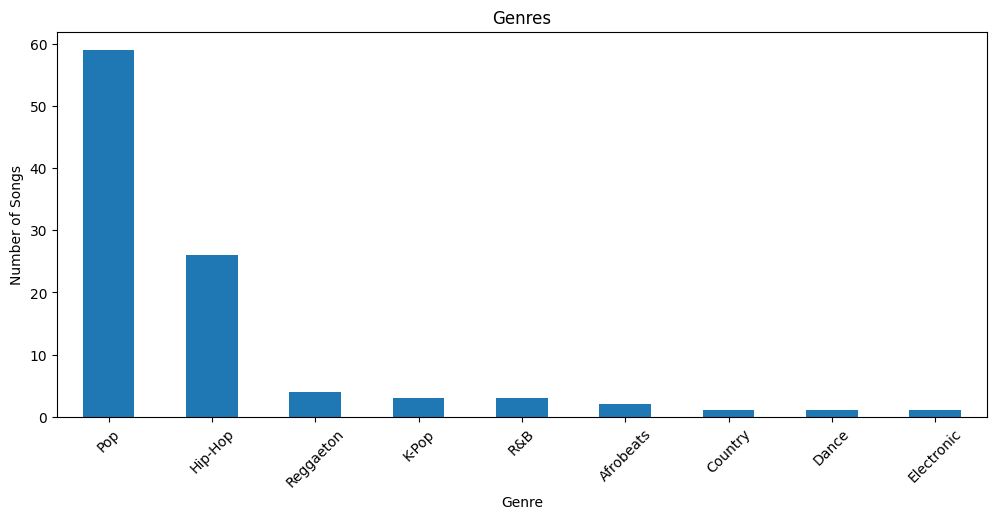

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
genre_counts.plot(kind="bar")
plt.title("Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.show()

In [12]:
#link to the dataset
#https://www.kaggle.com/datasets/dem0nking/billboard-hits-songs-dataset/data